In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
df = pd.read_csv(r"HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.shape

(506, 14)

In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
# mode fill for categorical variable
df['CHAS'].fillna(df['CHAS'].mode()[0], inplace = True)

/tmp/ipykernel_6806/1569017550.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CHAS'].fillna(df['CHAS'].mode()[0], inplace = True)


In [9]:
# fill median for numerical variable 
null_col = ['CRIM', 'ZN', 'INDUS', 'AGE', 'LSTAT']
for col in null_col: 
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipykernel_6806/3251595172.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipykernel_6806/3251595172.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [10]:
df.isnull().sum().sum()

np.int64(0)

## Check for outlier

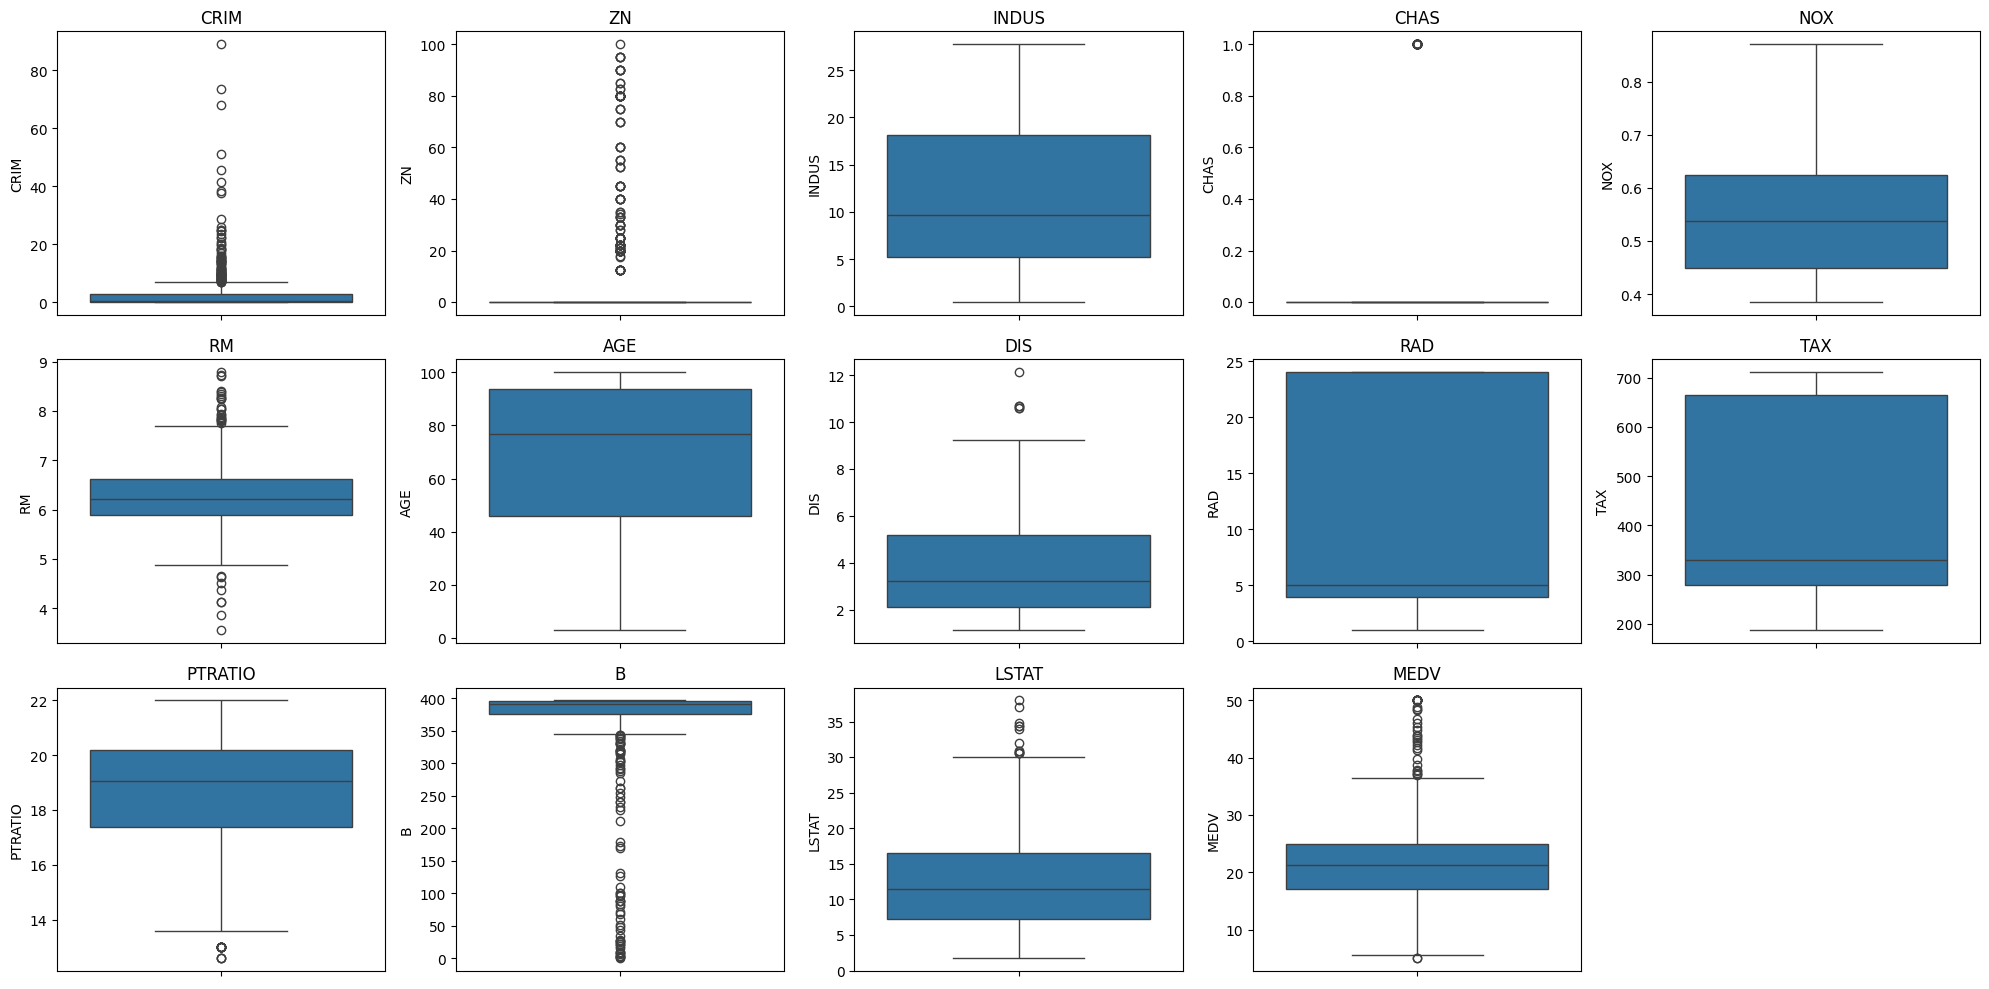

In [11]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns): 
    plt.subplot(3, 5, i+1)
    sns.boxplot(data = df[col])
    plt.title(col) 
plt.tight_layout() 
plt.show()

In [12]:
col_with_outlier = ['CRIM']

In [13]:
def remove_outlier(df, columns):
    df_clean = df.copy()
    for col in columns: 
        q1 = df_clean[col].quantile(0.25)
        q3 = df_clean[col].quantile(0.75)
        iqr = q3 - q1 
        min_r = q1 - 1.5 * iqr 
        max_r = q3 + 1.5 * iqr 
        df_clean = df_clean[(df_clean[col] >= min_r) & (df_clean[col] <= max_r)]
    return df_clean

In [14]:
cleaned_df = remove_outlier(df, col_with_outlier)
cleaned_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [15]:
df.shape

(506, 14)

In [16]:
cleaned_df.shape

(425, 14)

## Target Variable Distribution

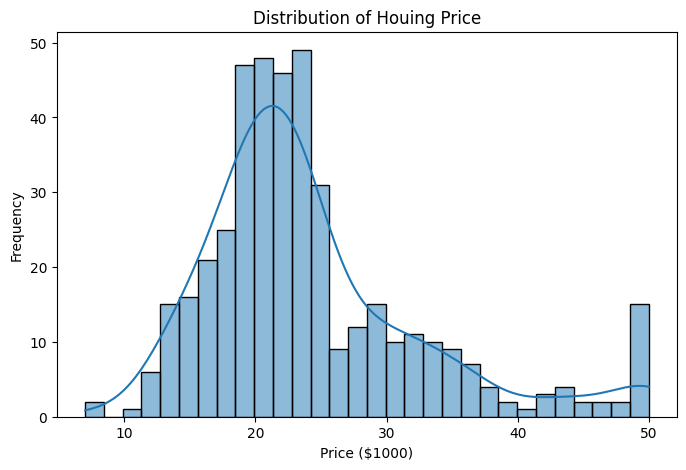

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_df['MEDV'], bins=30, kde=True)
plt.title("Distribution of Houing Price")
plt.xlabel('Price ($1000)')
plt.ylabel('Frequency')
plt.show()

## Correlation Heatmap

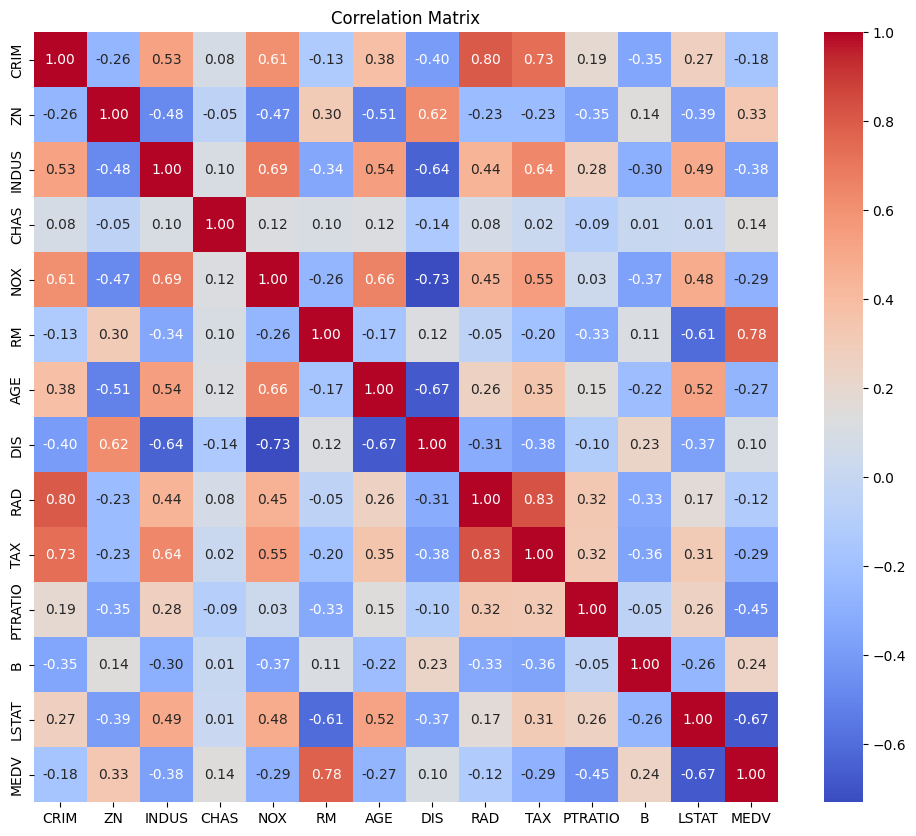

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(cleaned_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

## Top Features vs PRICE (Scatterplots)

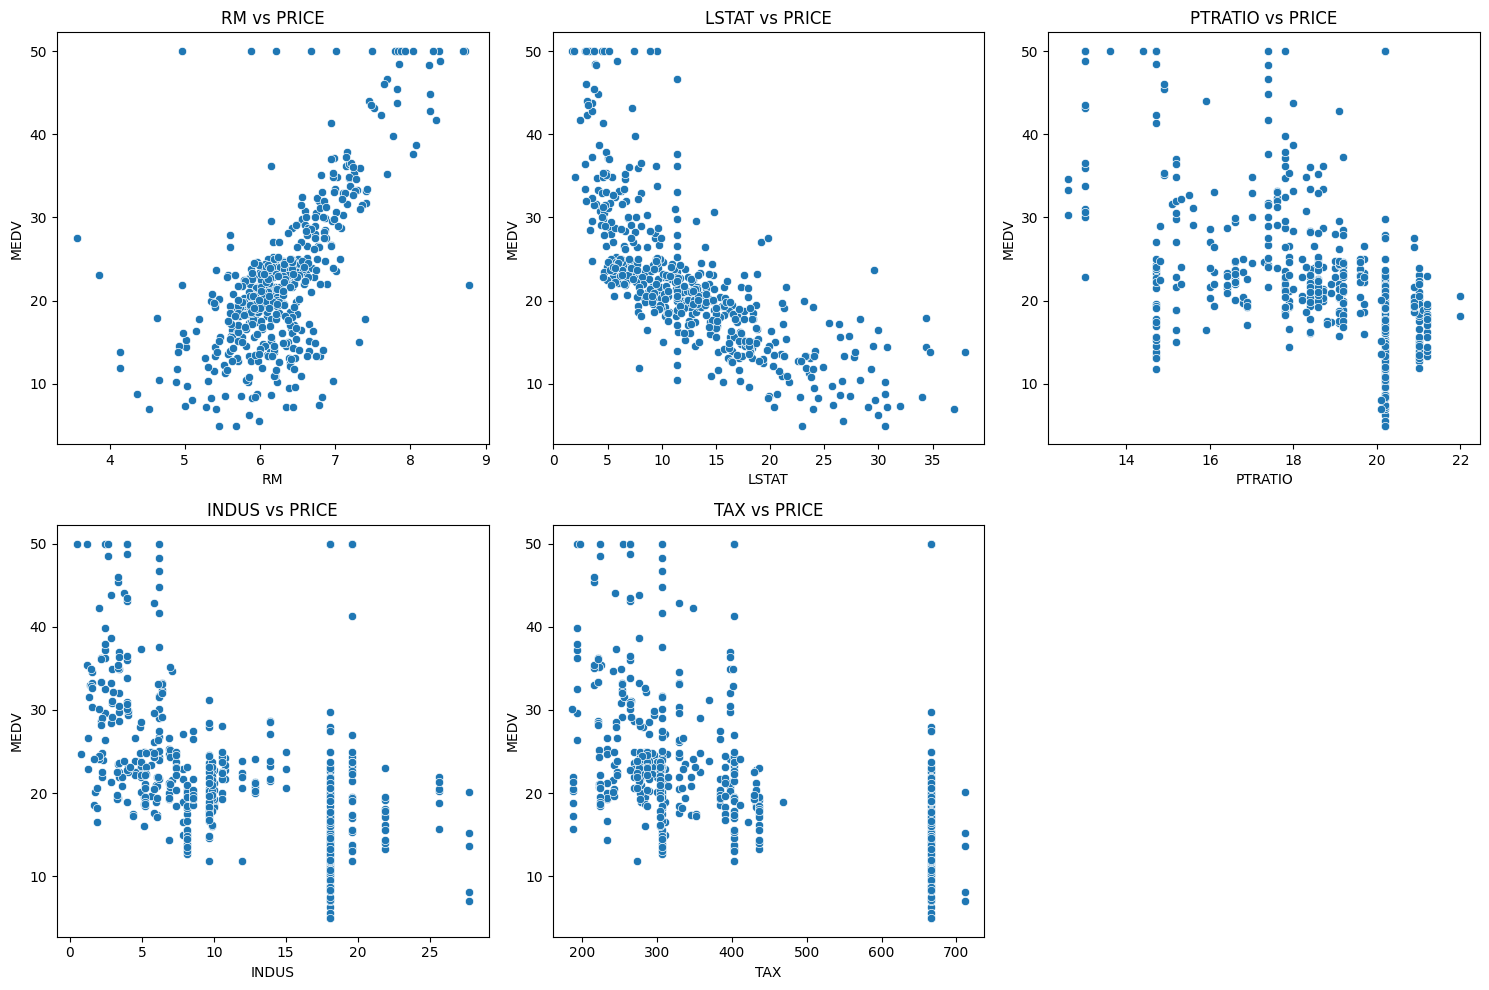

In [19]:
important_features = ['RM', 'LSTAT', 'PTRATIO', 'INDUS', 'TAX']

plt.figure(figsize=(15, 10))
for i, col in enumerate(important_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=df, x=col, y='MEDV')
    plt.title(f"{col} vs PRICE")
plt.tight_layout()
plt.show()


## Feature Selection

In [20]:
correlation = df.corr()['CHAS'].sort_values(ascending=False)
correlation

CHAS       1.000000
MEDV       0.183844
RM         0.106797
AGE        0.074984
NOX        0.070867
INDUS      0.054693
B          0.050608
RAD       -0.003339
ZN        -0.032992
TAX       -0.035822
LSTAT     -0.047279
CRIM      -0.055585
DIS       -0.092318
PTRATIO   -0.109451
Name: CHAS, dtype: float64

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [22]:
x = cleaned_df.drop('MEDV', axis=1)

In [23]:
x_vif = add_constant(x) 
vif = pd.DataFrame()
vif['features'] = x.columns 
vif['VIF'] = [variance_inflation_factor(x_vif.values, i+1) for i in range(len(x.columns))]

In [24]:
vif

,features,VIF
0,CRIM,3.617362
1,ZN,2.082431
2,INDUS,3.046055
3,CHAS,1.070926
4,NOX,4.079376
5,RM,1.971064
6,AGE,2.468524
7,DIS,3.333826
8,RAD,5.387527
9,TAX,4.960384


In [25]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [26]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
x = cleaned_df[features]
y = cleaned_df['MEDV']

## Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x_scaled)

In [29]:
x_poly.shape, y.shape

((425, 65), (425,))

## Split the dataset

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=41, test_size=0.1)

# Model Building

## Train Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [34]:
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(90.102230554913, 88.18614333606351)

In [35]:
y_pred_lr = lr.predict(x_test)

In [36]:
mean_absolute_error(y_test, y_pred_lr)

2.0374687591406895

In [37]:
mean_squared_error(y_test, y_pred_lr)

7.4620982894595755

In [38]:
r2_score(y_test, y_pred_lr)

0.8818614333606352

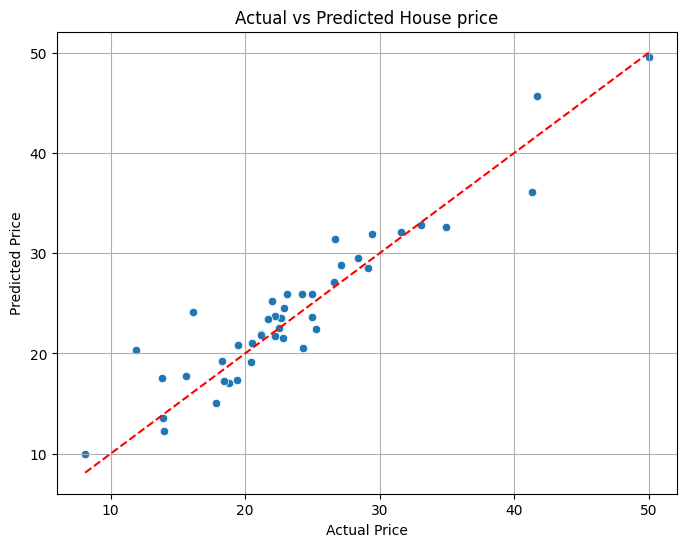

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y = y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Actual vs Predicted House price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

## Train Decision Tree

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
dt = DecisionTreeRegressor(random_state=42, min_samples_split=3)
dt.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=3, random_state=42)

In [42]:
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(99.59372620689429, 84.26142609299039)

In [43]:
y_pred_dt = dt.predict(x_test)

In [44]:
mean_absolute_error(y_test, y_pred_dt)

2.4639534883720926

In [45]:
mean_squared_error(y_test, y_pred_dt)

9.941104651162787

In [46]:
r2_score(y_test, y_pred_dt)

0.8426142609299039

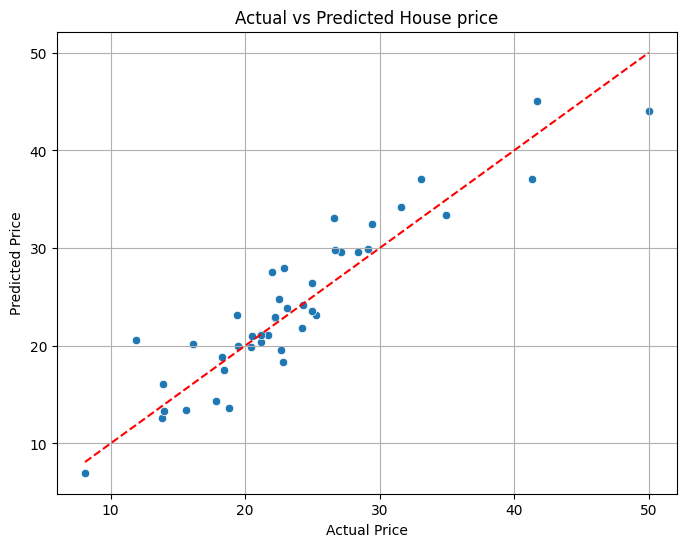

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y = y_pred_dt)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Actual vs Predicted House price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

## Train Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
rf.score(x_train, y_train)*100, rf.score(x_test, y_test)*100

(97.38193315326988, 85.7933729850825)

In [51]:
y_pred_rf = rf.predict(x_test)

In [52]:
mean_absolute_error(y_test, y_pred_rf)

2.0161860465116286

In [53]:
mean_squared_error(y_test, y_pred_rf)

8.973466511627898

In [54]:
r2_score(y_test, y_pred_rf)

0.8579337298508249

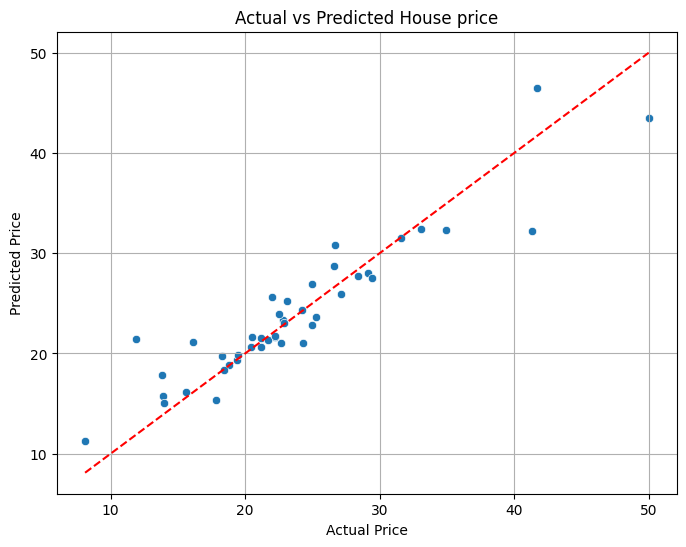

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y = y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Actual vs Predicted House price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

## Gradient Boosting Regressor

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

In [57]:
gb = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

In [58]:
gb.score(x_train, y_train)*100, gb.score(x_test, y_test)*100

(99.99981543471466, 88.92538487347483)

In [59]:
y_pred_gb = gb.predict(x_test)

In [60]:
mean_absolute_error(y_test, y_pred_gb)

2.0320158067967227

In [61]:
mean_squared_error(y_test, y_pred_gb)

6.99516414858298

In [62]:
r2_score(y_test, y_pred_gb)

0.8892538487347482

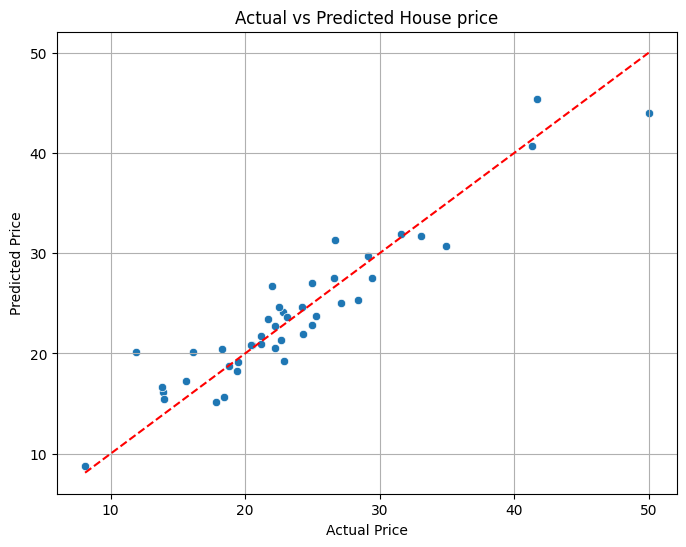

In [63]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y = y_pred_gb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Actual vs Predicted House price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

## Hyperparameter Tuning for Gradient Boosting Regressor

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
}

In [66]:
gbr = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=gbr,
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
grid_search.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [68]:
best_gbr = grid_search.best_estimator_
best_gbr

GradientBoostingRegressor(learning_rate=0.2, min_samples_split=5,
                          random_state=42)

In [69]:
y_pred_best = best_gbr.predict(x_test)

In [70]:
r2_score(y_test, y_pred_best)

0.8815524970658055

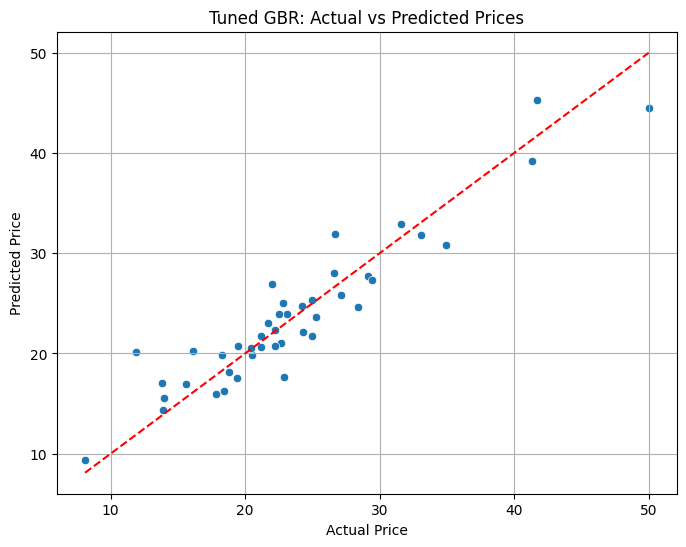

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Tuned GBR: Actual vs Predicted Prices")
plt.grid(True)
plt.show()

## Use PCA

In [72]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x_poly)

In [74]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.1, random_state=42)

In [75]:
gb_pca = GradientBoostingRegressor(random_state=42)
gb_pca.fit(x_train_pca, y_train_pca)
y_pred_pca = gb_pca.predict(x_test_pca)

In [76]:
mean_absolute_error(y_test_pca, y_pred_pca)

2.6282597677665565

In [77]:
mean_squared_error(y_test_pca, y_pred_pca)

12.106590673289789

In [78]:
r2_score(y_test_pca, y_pred_pca)

0.8531916596990338

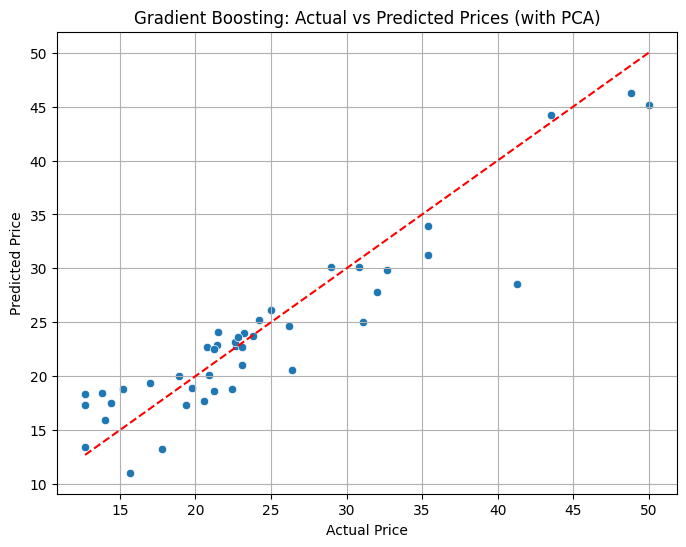

In [79]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_pca, y=y_pred_pca)
plt.plot([y_test_pca.min(), y_test_pca.max()], [y_test_pca.min(), y_test_pca.max()], '--r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting: Actual vs Predicted Prices (with PCA)")
plt.grid(True)
plt.show()

## Save the model

In [80]:
import joblib

In [81]:
joblib.dump(best_gbr, 'boston_housing_gbr_model.pkl')
joblib.dump(ss, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')
joblib.dump(poly, 'polynomial.pkl')

['polynomial.pkl']

In [82]:
loaded_model = joblib.load('boston_housing_gbr_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_poly = joblib.load('polynomial.pkl')

In [83]:
x.values.tolist()[4]

[0.06905, 0.0, 2.18, 0.0, 7.147, 54.2, 6.0622, 18.7, 396.9, 11.43]

In [84]:
new_data = np.array([[0.06905, 0.0,	2.18, 0.0 ,7.147, 54.2,	6.0622,	18.7, 396.90,	11.43]])

In [85]:
new_data_sclaed = loaded_scaler.transform(new_data)
new_data_poly = loaded_poly.transform(new_data_sclaed)

/home/sabin/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [86]:
prediction = loaded_model.predict(new_data_poly)

In [87]:
prediction

array([35.77718084])

In [88]:
y[4]

np.float64(36.2)

In [89]:
# Error in %
((36.2 - 35.77718084) / 36.2) * 100

1.1680087292817765